<a href="https://colab.research.google.com/github/hipeoplea/Sai/blob/main/Sai_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("train.csv")
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
print("\nИнформация о данных:")
print(df.info())
print("\nКоличество пропусков по столбцам:")
print(df.isna().sum())


Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Количество пропусков по столбцам:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare       

In [ ]:
print(len(set(df["Ticket"])))
print(df["Ticket"])

681
0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object


Посмотрев на признаки, я решила избавиться от некоторых


*   PassengerId - набор уникальных не влияющих ни на что значений
*   Name - текстовая категория в которой нельзя классифицировать данные, к тому же нет ни одного повторяющегося имени, в контексте логистической регрессии бесполезно
*   Ticket - текст + цифры так ещё и 681 уникальное значение
*   Cabin - слишком много пропусков что бы можно было действительно проследить какие-либо взаимосвязи

Дальше заполним остальные пропуски, age медианой, а embarked модой.

И закодируем категориальный признак sex.

In [ ]:
df = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])
df["Age"] = df["Age"].fillna(df["Age"].median())

df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
df = pd.get_dummies(df, columns=["Embarked"])

df["Sex"] = df["Sex"].map({"female": 0, "male": 1})
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


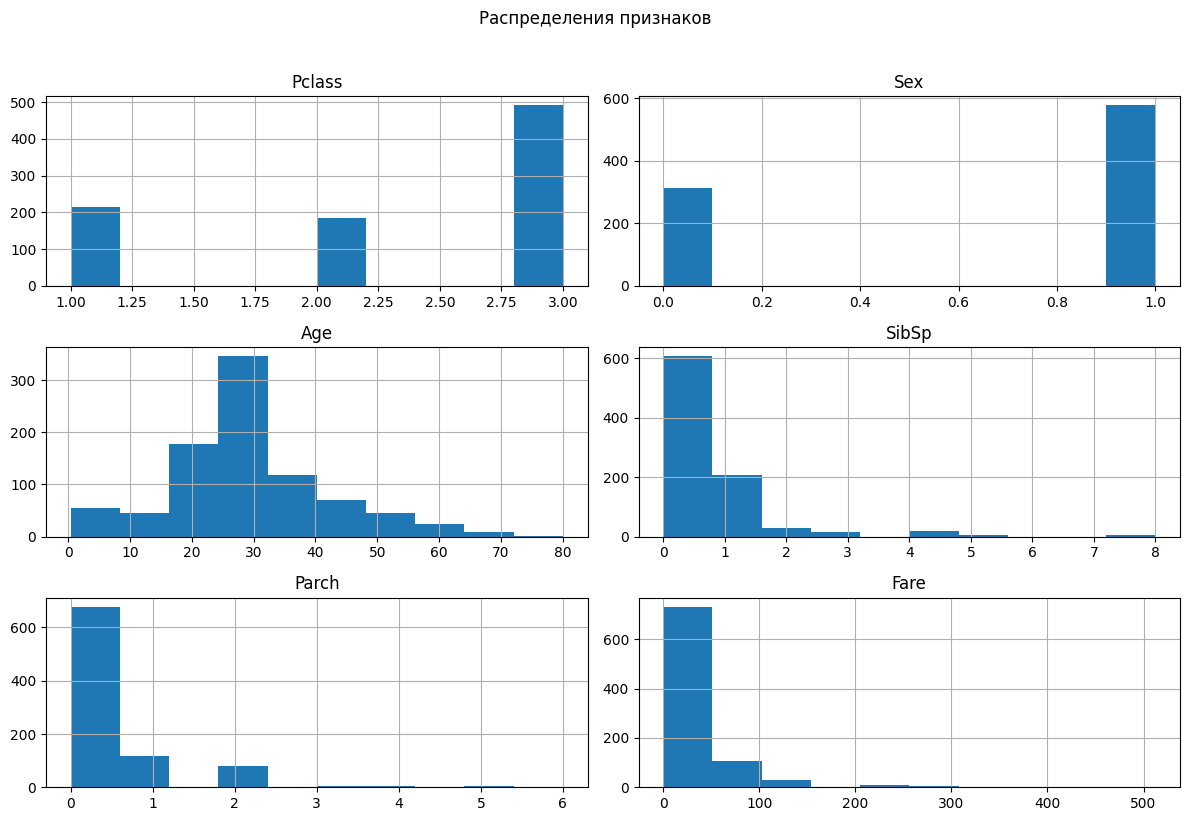

In [ ]:
numeric_cols = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]
df[numeric_cols].hist(figsize=(12, 8))
plt.suptitle("Распределения признаков", y=1.02)
plt.tight_layout()
plt.show()

<Figure size 500x400 with 0 Axes>

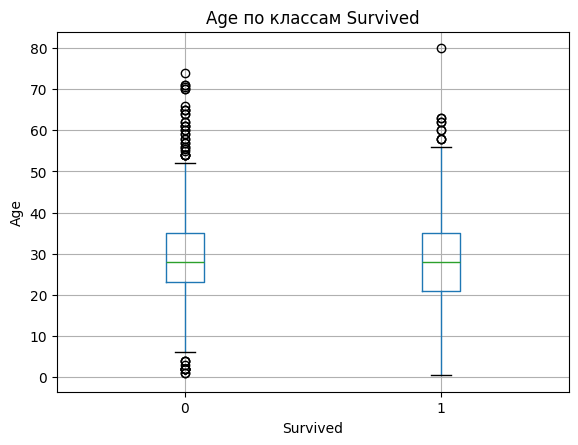

In [ ]:
plt.figure(figsize=(5,4))
df.boxplot(column="Age", by="Survived")
plt.title("Age по классам Survived")
plt.suptitle("")
plt.xlabel("Survived")
plt.ylabel("Age")
plt.show()

делим выборки(мем в чём на kagle нет поля survived в test.csv соответственно мы метрики высчитать не можем, поэтому просто делим наш train фаил)

In [ ]:
for col in ["Embarked_C", "Embarked_Q", "Embarked_S"]:
    df[col] = df[col].astype(int)

y = df["Survived"].values
X = df.drop(columns=["Survived"]).values


np.random.seed(42)
indices = np.arange(len(X))
np.random.shuffle(indices)

X = X[indices]
y = y[indices]

train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

std[std == 0] = 1

X_train_scaled = (X_train - mean) / std
X_test_scaled = (X_test - mean) / std

функция `sigmoid` вычисляет сигмоиду то есть сводит любое число в промежуток [0, 1] (превращаем взвешенную сумму признаков в вероятность)


In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

класс `LogisticRegressionScratch`, реализует логистическую регрессию с возможностью обучения методом градиентного спуска и методом Ньютона, а также поддержкой L2-регуляризации.

функция `log_loss` это функция ошибки (или функция потерь).
Она показывает, насколько плохи предсказания модели. Обучение модели строится на минимизации этой функции. Сначала обрезаем число до границ [eps, 1-eps].
Дальше вычисляем ошибку(относительное число задача просто минимизировать его) по формуле.
$$
L(y, \hat{y}) = - \big( y \cdot \ln(\hat{y}) + (1 - y) \cdot \ln(1 - \hat{y}) \big)
$$

Конструктор класса `__init__`
- **`lr`** — learning rate, скорость обучения.  
  Определяет, насколько сильно изменяются веса на каждом шаге градиентного спуска.

- **`n_iters`** — количество итераций обучения.  

- **`method`** — выбор метода оптимизации.

- **`l2`** — коэффициент L2-регуляризации.  
  Регуляризация добавляет штраф за большие веса, помогает избежать переобучения и стабилизирует обучение.

- **`weights`** — вектор весов модели.  

Метод `_add_bias(X)`
Добавляет колонку единиц, чтобы включить bias (w0) в вектор весов:

$$
z = w_0 + w_1 x_1 + w_2 x_2 + ...
$$

Метод `fit(X, y)`
- Добавление bias
- Инициализация весов нулями

Дальше у нас две вариации расчётов для метода по методу оптимизации градиентный спуск или метод Ньютона.

Градиентный спуск:

1. Линейная комбинация(считаем сумму весов)
$$
z = Xw
$$

2. Сигмоида(превращаем число в вероятность)
$$
\hat{y} = \sigma(z)
$$

3. Градиент log-loss(получаем направления куда двигаться) 1я производная
$$
\nabla J = \frac{1}{m} X^T(\hat{y} - y)
$$

4. L2-регуляризация(навешиваем штрафы если вес где-то слишком сильно должен вырасти)
$$
\nabla J_{reg} = \nabla J + \lambda w
$$
Bias не регуляризируется.

5. Обновление весов(обновляем веса у признаков)
$$
w := w - \alpha (\nabla J + \lambda w)
$$

Ньютон:
1. Линейная комбинация

2. Сигмоида

3. Матрица R (вторая производная сигмоиды) по диагонали значения кривизны остальное нули
$$
R_i = \hat{y}_i (1 - \hat{y}_i)
$$

4. Градиент (не делим на m потому что всё равно в гессиане оно сокращается)
$$
\nabla J = X^T (\hat{y} - y)
$$
5. Гессиан матрица вторых производных функции потерь по весам
$$
H = X^T R X
$$

Добавляется (маленькое число к диагонали Гессиана, для большей устройчивости):
$$
H := H + 10^{-4} I
$$

6. Шаг Ньютона (решаем уравнение для нахождения шага, нормируем шаг по количеству признаков)
$$
H \Delta = \nabla J
$$
$$
w := w - \Delta
$$

Метод `predict_proba`
Выдаёт вероятность выживания:

$$
\hat{y} = \sigma(Xw)
$$

Метод `predict`
Пороговая классификация:

если $\hat{y} ≥ 0.5$, то класс 1  
иначе класс 0

In [16]:
class LogisticRegressionScratch:
    def __init__(self, lr=0.01, n_iters=1000, method="gd", l2=0.0, verbose=False):
        self.lr = lr
        self.n_iters = n_iters
        self.method = method
        self.l2 = l2
        self.verbose = verbose
        self.weights = None

    def _add_bias(self, X):
        n_samples = X.shape[0]
        return np.hstack([np.ones((n_samples, 1)), X])

    def fit(self, X, y):
        X_bias = self._add_bias(X)
        n_samples, n_features = X_bias.shape

        self.weights = np.zeros(n_features)

        if self.method == "gd":
            for i in range(self.n_iters):
                linear = X_bias @ self.weights
                y_pred = sigmoid(linear)

                grad = (1 / n_samples) * (X_bias.T @ (y_pred - y))

                reg = self.l2 * self.weights
                reg[0] = 0

                self.weights -= self.lr * (grad + reg)

        elif self.method == "newton":
            for i in range(self.n_iters):
                linear = X_bias @ self.weights
                y_pred = sigmoid(linear)

                R = y_pred * (1 - y_pred)

                R_diag = np.diag(R)

                grad = X_bias.T @ (y_pred - y)
                H = X_bias.T @ R_diag @ X_bias

                H += 1e-4 * np.eye(H.shape[0])

                delta = np.linalg.solve(H, grad)
                self.weights -= delta / n_samples
        else:
            raise ValueError("Unknown method: use 'gd' or 'newton'")

    def predict_proba(self, X):
        X_bias = self._add_bias(X)
        return sigmoid(X_bias @ self.weights)

    def predict(self, X, threshold=0.5):
        proba = self.predict_proba(X)
        return (proba >= threshold).astype(int)

Accuracy (точность)
$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$

Precision (точность положительных предсказаний)
$$
Precision = \frac{TP}{TP + FP}
$$

Recall (полнота)
$$
Recall = \frac{TP}{TP + FN}
$$

F1 (гармоническое среднее Precision и Recall)
$$
F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}
$$



In [ ]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def precision(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1)) #надо 1 выдало 1
    fp = np.sum((y_true == 0) & (y_pred == 1)) #надо 0 выдало 1
    if tp + fp == 0:
        return 0.0
    return tp / (tp + fp)

def recall(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0)) #надо 1 выдало 0
    if tp + fn == 0:
        return 0.0
    return tp / (tp + fn)

def f1_score(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    if p + r == 0:
        return 0.0
    return 2 * p * r / (p + r)


In [17]:
methods = ["gd", "newton"]

learning_rates = [0.001, 0.01, 0.1]
n_iters_list_gd = [200, 500, 1000]

results = []

for method in methods:
    if method == "gd":
        n_iters_list = n_iters_list_gd
    else:
        n_iters_list = [1]

    for lr in learning_rates:
        for n_iters in n_iters_list:
            model = LogisticRegressionScratch(
                lr=lr,
                l2=lr,
                n_iters=n_iters,
                method=method,
                verbose=False
            )
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)

            acc = accuracy(y_test, y_pred)
            prec = precision(y_test, y_pred)
            rec = recall(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)

            results.append({
                "method": method,
                "lr": lr,
                "n_iters": n_iters,
                "accuracy": acc,
                "precision": prec,
                "recall": rec,
                "f1": f1
            })


results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="f1", ascending=False)
print(results_df.sort_values(by=['method','lr', 'n_iters']))

    method     lr  n_iters  accuracy  precision    recall        f1
0       gd  0.001      200  0.798883   0.745763  0.676923  0.709677
1       gd  0.001      500  0.793296   0.733333  0.676923  0.704000
2       gd  0.001     1000  0.793296   0.718750  0.707692  0.713178
3       gd  0.010      200  0.798883   0.716418  0.738462  0.727273
4       gd  0.010      500  0.798883   0.716418  0.738462  0.727273
5       gd  0.010     1000  0.804469   0.734375  0.723077  0.728682
6       gd  0.100      200  0.826816   0.793103  0.707692  0.747967
7       gd  0.100      500  0.826816   0.793103  0.707692  0.747967
8       gd  0.100     1000  0.826816   0.793103  0.707692  0.747967
9   newton  0.001        1  0.815642   0.758065  0.723077  0.740157
10  newton  0.010        1  0.815642   0.758065  0.723077  0.740157
11  newton  0.100        1  0.815642   0.758065  0.723077  0.740157
